In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from scipy.spatial import Delaunay

# Алгоритм "Best mitchell's candidate"

In [ ]:
import enum
class derrick_type(enum.Enum):
  first_type = 1
  second_type = 2
  third_type = 3
  fictitious_type = 4

class oil_derrick():
  def __init__(self, derrick_type_):
    self.derrick_type_ = derrick_type_

class well():
  def __init__(self, coordinate, derrick):
    self.coordinate = coordinate
    self.derrick = derrick
    self.x = coordinate[0]
    self.y = coordinate[1]




In [ ]:
class best_mitchells_candidate():
  def __init__(self, dot_count, candidates_count, initial_dots, bottom_left=None, top_left=None,
               top_right=None, bottom_right=None, offset=0):
    if bottom_left is None or top_left is None or top_right is None or bottom_right is None:
      x = []
      y = []
      for dot in initial_dots:
        x.append(dot[0])
        y.append(dot[1])
      min_x = min(x)
      max_x = max(x)
      min_y = min(y)
      max_y = max(y)
      self.bottom_left = [min_x, min_y] if bottom_left is None else bottom_left
      self.bottom_right = [max_x, min_y] if bottom_right is None else bottom_right
      self.top_left = [min_x, max_y] if top_left is None else top_left
      self.top_right = [max_x, max_y] if top_right is None else top_right
    else:
      self.bottom_left = bottom_left
      self.bottom_right = bottom_right
      self.top_left = top_left
      self.top_right = top_right


    # количество точек (настоящие скважины + фиктивные)
    self.dot_count = dot_count 

    self.initial_dots_count = len(initial_dots)
    # количество точек-кандидатов (среди них будет выбрана наиболее отдаленная от всех существующих точек)
    self.candidates_count = candidates_count 

    self.placed_dots = initial_dots

    self.start_cycle()

  def add_more_dots(self, dot_count):
    self.dot_count += dot_count
    self.start_cycle()
  def get_new_dots(self):
    return self.placed_dots[self.initial_dots_count:]
  # создание точек с количествовом равным dot_count, которое мы передаем в конструктор
  def start_cycle(self):
    i = len(self.placed_dots)
    while i < self.dot_count:
      self.place_new_dot()
      i+=1

  # добавление сгенерированной точки
  def place_new_dot(self):
    dot = self.generate_best_dot()
    self.placed_dots.append(dot)

  # генерация случайных координат для точки, используется при создании кандидатов на очередную точку
  def generate_random_postition(self):
    x = np.random.uniform(self.bottom_left[0], self.bottom_right[0])
    y = np.random.uniform(self.bottom_left[1], self.top_left[1])
    return [x, y]
  
  # поиск ближайшей точки до данной (идет перебор всех точек и сравниваются расстояния)
  def get_distance_to_nearest_dot(self, candidate):
    shortest = None
    ammount = len(self.placed_dots) - 1
    while ammount >= 0:
      distance = self.get_distance(self.placed_dots[ammount], candidate)
      if shortest is None or distance < shortest:
        shortest = distance
      ammount -= 1
    return shortest
  
  # подсчет расстояния с помощью теоремы Пифагора
  def get_distance(self, first_dot, second_dot):
    x_distance = np.abs(first_dot[0] - second_dot[0])
    y_distance = np.abs(first_dot[1] - second_dot[1])

    distance = np.sqrt(np.power(x_distance, 2) + np.power(y_distance, 2))
    return distance

 
  # создаем candidates_count точек, выбираем среди них самую удаленную от всех остальных
  def generate_best_dot(self):
    i = 0
    best_dot = None
    best_dot_distance = -1
    while i < self.candidates_count:
      candidate = self.generate_random_postition()
      if len(self.placed_dots) == 0:
        return candidate
      distance = self.get_distance_to_nearest_dot(candidate)
      if best_dot is None or distance > best_dot_distance:
        best_dot = candidate
        best_dot_distance = distance
      i += 1
    return best_dot
  

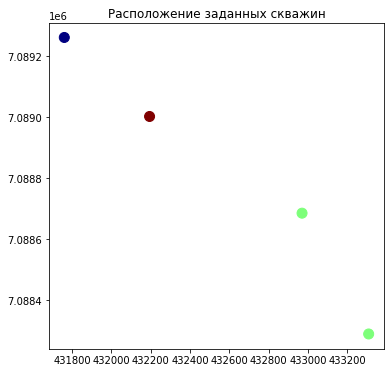

In [ ]:
cmap = plt.cm.jet
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
bounds = np.linspace(0,4,4+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)





list_of_derricks = [oil_derrick(derrick_type_=derrick_type.first_type),
                    oil_derrick(derrick_type_=derrick_type.second_type),
                    oil_derrick(derrick_type_=derrick_type.third_type)]

initial_wells = [well([432970, 7088685], list_of_derricks[1]),
                 well([433309, 7088289], list_of_derricks[1]),
                 well([431760, 7089261], list_of_derricks[0]),
                 well([432194, 7089002], list_of_derricks[2])]
# рисуем данные скважины

initial_wells_for_scatter = []
initial_well_types = []

for well_ in initial_wells:
  initial_wells_for_scatter.append(well_.coordinate)
  initial_well_types.append(well_.derrick.derrick_type_.value)

fig, ax = plt.subplots(1,1, figsize=(6,6))
scat = ax.scatter(*zip(*initial_wells_for_scatter),c=initial_well_types, s=100,cmap=cmap)



ax.set_title('Расположение заданных скважин')

# plt.xlim(0, width)
# plt.ylim(0, height)
plt.show()

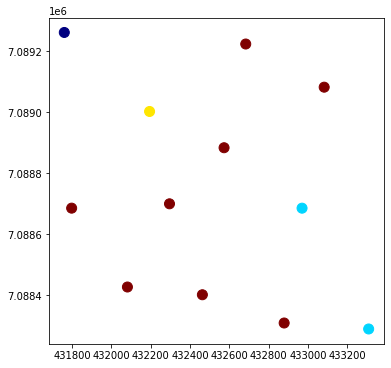

In [ ]:
# создаем фиктивные скважины
alg = best_mitchells_candidate(dot_count=12, candidates_count=30, initial_dots=[well_.coordinate for well_ in initial_wells])
#, bottom_left=[431800,7080000], top_left=[431800, 7090000], top_right=[435200, 7090000], bottom_right=[435200,7080000]
cmap = plt.cm.jet
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
bounds = np.linspace(0,len(alg.placed_dots),len(alg.placed_dots)+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)


# массив фиктивных скважин

generated_dots = np.array(alg.get_new_dots())

for dot in generated_dots:
  initial_wells.append(well(dot, oil_derrick(derrick_type.fictitious_type)))

fig, ax = plt.subplots(1,1, figsize=(6,6))
scat = ax.scatter(*zip(*[well.coordinate for well in initial_wells]),c=[well.derrick.derrick_type_.value for well in initial_wells], s=100,cmap=cmap)
# рисуем фиктивные скважины вместе с заданными
# plt.xlim(0, alg.width)
# plt.ylim(0, alg.height)

plt.show()

# Триангуляция Делони

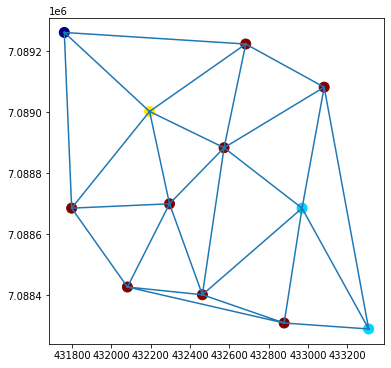

In [ ]:
points = np.array([well.coordinate for well in initial_wells])

fig, ax = plt.subplots(1,1, figsize=(6,6))

tri = Delaunay([well.coordinate for well in initial_wells])


plt.triplot(points[:,0], points[:,1], tri.simplices)

scat = ax.scatter(*zip(*points),c=[well.derrick.derrick_type_.value for well in initial_wells], s=100,cmap=cmap)



# Убираем стороны треугольников, лежащих против тупых углов

In [ ]:

# фукнция для рассчета угла abc по заданным точкам a, b, c
def obtuse_angle(a, b, c):
  a = np.array(a)
  b = np.array(b)
  c = np.array(c)
  ba = a - b
  bc = c - b
  cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
  angle = np.arccos(cosine_angle)
  return np.degrees(angle) <= 90





# Убираем связи скважин с одинаковыми типами у полученной триангуляции

Результирующий массив связей
[[[432970, 7088685], [432878.9630019941, 7088308.58001626]], [[432878.9630019941, 7088308.58001626], [433309, 7088289]], [[433082.66697961587, 7089081.644311878], [432970, 7088685]], [[432970, 7088685], [432878.9630019941, 7088308.58001626]], [[432573.13665964844, 7088883.145236756], [432970, 7088685]], [[432970, 7088685], [433082.66697961587, 7089081.644311878]], [[432462.7428347687, 7088401.204625405], [432970, 7088685]], [[432573.13665964844, 7088883.145236756], [432970, 7088685]], [[432194, 7089002], [432295.43427123816, 7088699.33744866]], [[432194, 7089002], [432573.13665964844, 7088883.145236756]], [[432194, 7089002], [432683.4131360379, 7089223.120571473]], [[432194, 7089002], [431760, 7089261]], [[432194, 7089002], [432573.13665964844, 7088883.145236756]], [[431797.4270624674, 7088685.085769281], [432194, 7089002]], [[432194, 7089002], [431760, 7089261]], [[431797.4270624674, 7088685.085769281], [431760, 7089261]], [[432295.43427123816, 7088699.337

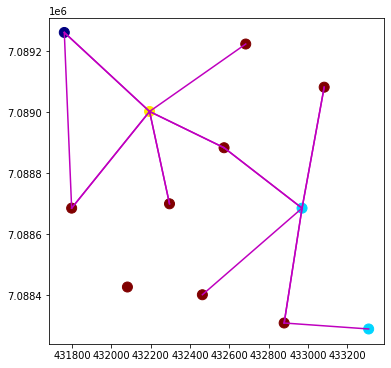

In [ ]:
# важно преобразовать в numpy.array!
initial_wells = np.array(initial_wells)

triangle_coordinates = initial_wells[tri.simplices]
fig, ax = plt.subplots(1,1, figsize=(6,6))
scat = ax.scatter(*zip(*points),c=[well.derrick.derrick_type_.value for well in initial_wells], s=100,cmap=cmap)


# финальный массив после триангуляции
result_array_of_coordinates = []

result_array_of_derricks = []


def plot_and_append(first_index, second_index):
  plt.plot([t[first_index].x, t[second_index].x],[t[first_index].y,t[second_index].y], 'm')

  result_array_of_coordinates.append([[t[first_index].x, t[first_index].y],[t[second_index].x, t[second_index].y]])
  result_array_of_derricks.append([t[first_index],t[second_index]])
for t in triangle_coordinates:
  # if t[0].derrick.derrick_type_ == derrick_type.fictitious_type and t[1].derrick.derrick_type_ == derrick_type.fictitious_type:
  #   break
  # if t[1].derrick.derrick_type_ == derrick_type.fictitious_type and t[2].derrick.derrick_type_ == derrick_type.fictitious_type:
  #   break
  # if t[0].derrick.derrick_type_ == derrick_type.fictitious_type and t[2].derrick.derrick_type_ == derrick_type.fictitious_type:
  #   break
  if t[0].derrick.derrick_type_ != t[1].derrick.derrick_type_ and obtuse_angle(t[0].coordinate,t[2].coordinate,t[1].coordinate):
    plot_and_append(0,1)
  if t[1].derrick.derrick_type_ != t[2].derrick.derrick_type_ and obtuse_angle(t[1].coordinate,t[0].coordinate,t[2].coordinate):
    plot_and_append(1,2)
  if t[0].derrick.derrick_type_ != t[2].derrick.derrick_type_ and obtuse_angle(t[0].coordinate,t[1].coordinate,t[2].coordinate):
    plot_and_append(0,2)






print("Результирующий массив связей")
print(result_array_of_coordinates)
print(result_array_of_derricks)


#DFS

In [ ]:
def dfs(graph, start, visited=None):
    if visited is None:
        visited = set()
    visited.add(start)
    print(start)
    for next in graph[start] - visited:
        dfs(graph, next, visited)
    return visited
 
graph = {'0': set(['1', '2']),
         '1': set(['0', '3', '4']),
         '2': set(['0']),
         '3': set(['1']),
         '4': set(['2', '3'])}
 
dfs(graph, '0')

0
2
1
3
4


{'0', '1', '2', '3', '4'}

# Алгоритм сканирования Грэхема

In [ ]:
def ccw(p1,p2,p3):
  return (p2[0]-p1[0])*(p3[1]-p1[1]) - (p2[1]-p1[1])*(p3[0]-p1[0])

In [ ]:
print(points)
x = points

x = x[x[:, 0].argsort()]

P = x

print("Sorted:")
print(P)

l_upper = [P[0], P[1]]
n_l = len(l_upper)

i = 3

while i < len(P):
  l_upper.append(P[i])
  n_l += 1
  while True:
    if n_l <= 2 or ccw(P[n_l-2],P[n_l-1],P[n_l]) < 0:
      break
    else:
      P = np.delete(P, n_l - 1, axis=0)
      n_l -= 1   
  i += 1


print(P)
print(l_upper)

[[ 432970.         7088685.        ]
 [ 433309.         7088289.        ]
 [ 431760.         7089261.        ]
 [ 432194.         7089002.        ]
 [ 432322.17470834 7088360.14419105]
 [ 433200.50305871 7089180.57252631]
 [ 431823.83427246 7088590.89602803]
 [ 432671.05600042 7089172.4058713 ]
 [ 432917.16814012 7088290.48100384]
 [ 432719.95585851 7088526.11935457]
 [ 433297.53512066 7088636.91567377]
 [ 432366.46805657 7088750.71637615]]
Sorted:
[[ 431760.         7089261.        ]
 [ 431823.83427246 7088590.89602803]
 [ 432194.         7089002.        ]
 [ 432322.17470834 7088360.14419105]
 [ 432366.46805657 7088750.71637615]
 [ 432671.05600042 7089172.4058713 ]
 [ 432719.95585851 7088526.11935457]
 [ 432917.16814012 7088290.48100384]
 [ 432970.         7088685.        ]
 [ 433200.50305871 7089180.57252631]
 [ 433297.53512066 7088636.91567377]
 [ 433309.         7088289.        ]]
[[ 431760.         7089261.        ]
 [ 431823.83427246 7088590.89602803]
 [ 432194.         7089002. 

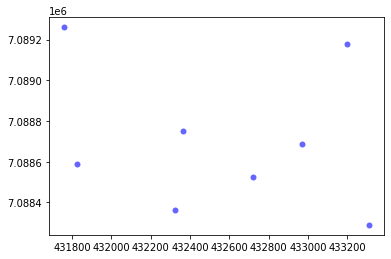

In [ ]:
plt.scatter(*zip(*l_upper), color='b', alpha=0.6, lw=0)

plt.show()

# ES-MDA

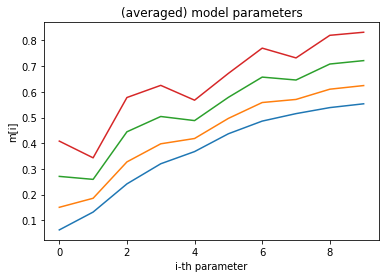

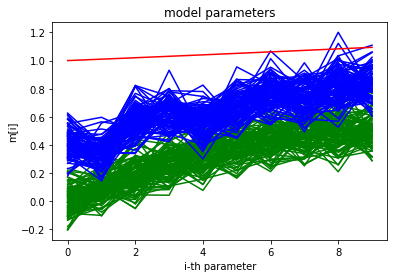

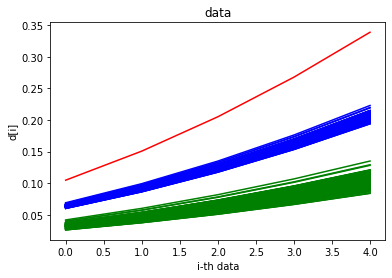

green = initial ensemble
blue = ensemble at last iteration
red = the answer


In [ ]:

#Constants

mLength = 10 #the length of the parameter m
dLength = 5 #the length of the data d
nEnsemble = 100 #the number of ensembles

alpha_max = 1000.
maxIter = 4

#Declaring variables

stdevD = np.ones(dLength)*1. #standard deviation of the data
stdevM = np.ones(mLength)*1.

mInit = np.zeros(mLength) #Initial ensemble
mAnswer = np.zeros(mLength) #True parameter values
mPrior = np.zeros([mLength, nEnsemble]) #Prior ensemble
mPred = np.zeros([mLength, nEnsemble]) #Predicted ensemble
mAverage = np.zeros(mLength)
dAverage = np.zeros(dLength)
dPrior = np.zeros([dLength, nEnsemble]) #Prior ensemble

d = np.zeros([dLength, nEnsemble]) #Forecasted data
obsData = np.zeros([dLength, nEnsemble]) #Observed data --> true data + measurement noise
dAnswer = np.zeros(dLength) #True data values
alpha = np.zeros(nEnsemble)
z = np.zeros([dLength, nEnsemble])

deltaM = np.zeros([mLength, nEnsemble])
deltaD = np.zeros([dLength, nEnsemble])
ddMD = np.zeros(nEnsemble)
ddDD = np.zeros(nEnsemble)

for p in range(maxIter):
    alpha[p] = (2**(maxIter-p))

#Generating the initial parameter (base case)
for i in range(mLength):
    ''' Here, you can initialize your own model parameter'''
    a = i/mLength
#Some functions that might be used
#    mInit[i] = np.random.uniform(0,1)*1.
#    mInit[i] = np.random.uniform(0,1)*0.005
#    mInit[i] = a**2 + 1
    mInit[i] = a/(a**2 + 1)


#--------------------------------------------------FUNCTIONS-------------------------------------------------------------#
#Calculating the observation based on the parameter. This is function d = g(m)
#the non-linear functions obsData = gFunctions(parameters, dLength)
#In the reservoir, the function is much more complex and needs a reservoir simulator to solve it (Eclipse, Intersect, etc.)


def gFunctions(parameters, dLength):
    ''' Here, you can make your own functions!'''

    predData = np.zeros(dLength)
    
    mSum = np.sum(parameters)
    for i in range(dLength):
        a = i/dLength
#       predData[i] = mSum/(a + 1)
        predData[i] = mSum*(a+1)**2/(100)
        
    return predData
   
#----------------------------------------------THE 'ANSWERS'-------------------------------------------------------------#

#This parts consists of parameters that are considered the truth value of the model. 
#Consequently, by plugging it into the gFunction() we would get the true observed data (data without noise) 

for i in range(mLength):
    ''' Here, you store the true value of the model parameter'''

    a = i/mLength
#    mAnswer[i] = a**3 + a**2 + 5
#    mAnswer[i] = a**2 + 10*a + 5
#    mAnswer[i] = np.sin(a*np.pi/6)
#    mAnswer[i] = np.cos(a*np.pi/6)
#    mAnswer[i] = 1/(a**2 + 3)
    mAnswer[i] = np.exp(a/10)

dAnswer[:] = gFunctions(mAnswer[:], dLength)

stdevD = np.diag(dAnswer*0.001)
stdevM = np.multiply(mAnswer,0.1)

#------------------------------------------------POPULATING ENSEMBLE-----------------------------------------------------#
#Populate ensemble based on mean and standard deviation (we assume normal distribution for the noise in measurement)

#Perturb the parameter
for i in range(mLength):
    mPrior[i,:] = np.random.normal(mInit[i], np.abs(stdevM[i]), nEnsemble)
    
m = mPrior #Initial ensemble

#Calculate prediction
for j in range(nEnsemble):
    dPrior[:,j] = gFunctions(mPrior[:,j], dLength)
    d[:,j] = gFunctions(mPrior[:,j], dLength)

#d = dPrior
    
#------------------------------------------MAIN LOOP STARTS HERE---------------------------------------------------------#


for p in range(maxIter):
    #Get data
    
    #Adding measurement noise to the true data    
    for i in range(dLength):
        obsData[i,:] = np.random.normal(dAnswer[i], np.abs(stdevD[i,i]), nEnsemble)
    
    #Calculate Average and Covariance MD and Covariance DD
    for i in range(mLength):
        summationM = np.sum(mPrior[i,:])
        mAverage[i] = (1/nEnsemble)*summationM
    
    for i in range(dLength):
        summationD = np.sum(dPrior[i,:])
        dAverage[i] = (1/nEnsemble)*summationD
    
    ddMD = 0.
    ddDD = 0.
    for j in range(nEnsemble):
        deltaM[:,j] = mPrior[:,j] - mAverage[:]
        deltaD[:,j] = dPrior[:,j] - dAverage[:]
        
        #This should be a matrix
        ddMD += np.outer(deltaM[:,j],deltaD[:,j])
        ddDD += np.outer(deltaD[:,j],deltaD[:,j])

    covarianceMD = ddMD / (nEnsemble - 1.)
    covarianceDD = ddDD / (nEnsemble - 1.)

    #Main update equation
    for j in range(nEnsemble):
        dummyMat = np.matmul(covarianceMD,np.linalg.inv(covarianceDD + alpha[p]*stdevD)) 
        dummyVec = obsData[:,j] - dPrior[:,j]
        mPred[:,j] = mPrior[:,j] + np.matmul(dummyMat,dummyVec)

    
    #Calculate new forecast based on the predicted parameters
    for j in range(nEnsemble):
        dPrior[:,j] = gFunctions(mPred[:,j], dLength)
    
    #Update the prior parameter for next iteration
    mPrior = mPred
        
    #Plotting for change of average of the parameters
    meanP = np.average(mPred, axis=1)
    plt.figure(3)
    plt.plot(meanP)

    plt.title('(averaged) model parameters')
    plt.xlabel('i-th parameter')
    plt.ylabel('m[i]')

    plt.draw()

#-------------------------------------------------OUTPUT-----------------------------------------------------------------#

#Plot of the ensemble of the parameters
plt.figure(1)
plt.plot(m, 'g-')
plt.plot(mPred, 'b-')
plt.plot(mAnswer, 'r-')

plt.title('model parameters')
plt.xlabel('i-th parameter')
plt.ylabel('m[i]')

plt.show()

#Plot of the ensemble of the data
plt.figure(2)
plt.plot(d, 'g-')
plt.plot(dPrior, 'b-')
plt.plot(dAnswer, 'r-')

plt.title('data')
plt.xlabel('i-th data')
plt.ylabel('d[i]')
plt.show()

print('green = initial ensemble')
print('blue = ensemble at last iteration')
print('red = the answer')